In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas
import pandas as pd


df = pd.read_csv('data (1).csv')
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
#print(df)
#df = df.dropna(thresh=1500, axis=0)
#print(df)
#df = df.dropna(axis=0)
y = df.diagnosis.replace({'B': 1, 'M': 0})
""" for i in range(0,len(y)):
    if y.loc[i] == 'M':
        y.loc[i] = 1
    if y.loc[i] == 'B':
        y.loc[i] = 0  """
x = df
x = x.drop('diagnosis', axis=1)
x = x.drop('id',axis=1)

#print(x)
#print(y)




In [2]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test

#Import svm model
from sklearn import svm

#Create linear
linear = svm.SVC(kernel='linear')
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_test)

#Create poly
poly = svm.SVC(kernel='poly')
poly.fit(X_train, y_train)
y_pred_poly = poly.predict(X_test)

#Create rbf
rbf = svm.SVC(kernel='rbf')
rbf.fit(X_train, y_train)
y_pred_rbf = rbf.predict(X_test)

#Create sigmoid
sigmoid = svm.SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
y_pred_sigmoid = sigmoid.predict(X_test)


In [3]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


def printMetrics(y_test, y_pred):
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

print("linear")
printMetrics(y_test,y_pred_linear)
print("poly")
printMetrics(y_test,y_pred_poly)
print("rbf")
printMetrics(y_test,y_pred_rbf)
print("sigmoid")
printMetrics(y_test,y_pred_sigmoid)


linear
Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629
poly
Accuracy: 0.9181286549707602
Precision: 0.8852459016393442
Recall: 1.0
rbf
Accuracy: 0.9239766081871345
Precision: 0.8925619834710744
Recall: 1.0
sigmoid
Accuracy: 0.39766081871345027
Precision: 0.5210084033613446
Recall: 0.5740740740740741


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

""" tunningParams = { 'C': [0.1, 1, 10, 100],  
   'gamma': [1, 0.1, 0.01, 0.001],
   'kernel': ['rbf','linear','sigmoid','poly'],
   'degree': [3,4,5]  
    } 
 """
tunningParams = { 'C': [0.1, 1, 10, 100],  
   'gamma': [1, 0.1, 0.01, 0.001],
   'kernel': ['rbf','sigmoid','linear']
    }
grid = GridSearchCV(svm.SVC(), tunningParams, refit = True, verbose = 3,n_jobs=8) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 100, 'gamma': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.99      0.96      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [5]:
""" #Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred)) """


' #Import scikit-learn dataset library\nfrom sklearn import datasets\n\n#Load dataset\ncancer = datasets.load_breast_cancer()\n# Import train_test_split function\nfrom sklearn.model_selection import train_test_split\n\n# Split dataset into training set and test set\nX_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test\n#Import svm model\nfrom sklearn import svm\n\n#Create a svm Classifier\nclf = svm.SVC(kernel=\'linear\') # Linear Kernel\n\n#Train the model using the training sets\nclf.fit(X_train, y_train)\n\n#Predict the response for test dataset\ny_pred = clf.predict(X_test)\n#Import scikit-learn metrics module for accuracy calculation\nfrom sklearn import metrics\n\n# Model Accuracy: how often is the classifier correct?\nprint("Accuracy:",metrics.accuracy_score(y_test, y_pred))\n# Model Precision: what percentage of positive tuples are labeled as such?\nprint("Precision:",metrics.precision_score(

huh


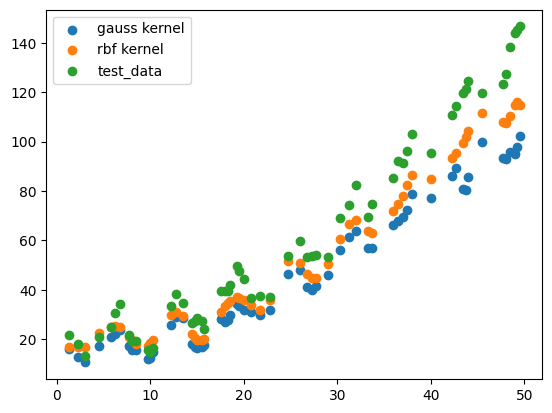

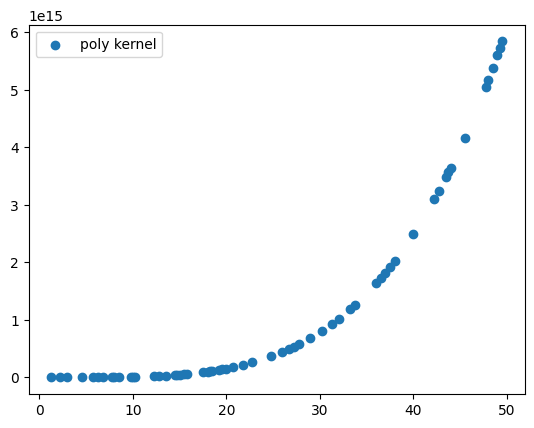

In [6]:
import matplotlib.pyplot as plt
import math
import numpy as np
df = pd.read_csv('data.csv')
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
x = df.x
y = df.y
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test
#plt.scatter(X_train,y_train)
#plt.show()
#Gaussioan RBF
def Gauss_k(x,y):
    #return np.exp(-0.5*np.linalg.norm(x-y))
    return np.exp(-0.5 * ((x - y) /0.6) ** 2)
    #return math.e**-(gamma*(x-y)**2)

def linear_K(x,y):
    return x*y

def rbf_k(x,y):
    return np.exp(-0.5*abs(x - y)**2)
    #return np.exp(-0.5 * ((np.linalg.norm(x - y)) / 0.2) ** 2)


def poly_k(x,y):    
    return (np.dot(x,y) + 0.5) ** 4

""" y_pred_mine = np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]-1):
        #print(Gauss_k(X_test.iloc[i],X_test.iloc[i]))
    for j in range(len(alpha)):
        y_pred_mine[i] += alpha[j] * linear_K(X_test.iloc[i],K[i,j]) """

K=np.zeros((X_train.shape[0],X_train.shape[0]))
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[0]):
        #print("from ",X_train.iloc[i],X_train.iloc[j],"We get",Gauss_k(X_train.iloc[i],X_train.iloc[j]))
        K[i,j]=Gauss_k(X_train.iloc[i],X_train.iloc[j])
print("huh")
alpha = abs((np.linalg.inv(K+np.identity(X_train.shape[0]))).dot(y_train))
#alpha = np.linalg.solve(K, y_train)
#print(alpha)
y_pred_gaus = []
for i in X_test:
    weights = np.array([Gauss_k(i,xt) for xt in X_train])    
    #y_pred_mine.append(np.sum(weights*y_train)/np.sum(weights))
    #weights = np.array([linear_K(i, xt) for xt in X_train])
    #weighted_sum = np.sum(weights * y_train) / np.sum(weights)
    #print(weights)
    y_pred_gaus.append(weights.dot(alpha))
    #print(weights.dot(alpha))




K=np.zeros((X_train.shape[0],X_train.shape[0]))
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[0]):
        K[i,j]=rbf_k(X_train.iloc[i],X_train.iloc[j])
alpha = abs((np.linalg.inv(K+np.identity(X_train.shape[0]))).dot(y_train))
y_pred_rbf_k = []
for i in X_test:
    weights = np.array([rbf_k(i,xt) for xt in X_train])        
    y_pred_rbf_k.append(weights.dot(alpha))



K=np.zeros((X_train.shape[0],X_train.shape[0]))
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[0]):
        K[i,j]=poly_k(X_train.iloc[i],X_train.iloc[j])
alpha = abs((np.linalg.inv(K+np.identity(X_train.shape[0]))).dot(y_train))
y_pred_poly= []
for i in X_test:
    weights = np.array([poly_k(i,xt) for xt in X_train])    
    y_pred_poly.append(weights.dot(alpha))


""" weights = np.array([self.gaussian_kernel(x, x_train) for x_train in self.X_train])
weighted_sum = np.sum(weights * self.y_train) / np.sum(weights) """
#print(len(y_pred_mine))
#print(len(X_test))
#print(y_pred_mine)
#plt.scatter(X_train,y_train,label="train")
plt.scatter(X_test,y_pred_gaus,label="gauss kernel")
plt.scatter(X_test,y_pred_rbf_k,label="rbf kernel")
#plt.scatter(X_test,y_pred_poly,label="poly kernel")
plt.scatter(X_test,y_test,label="test_data")
plt.legend()
plt.show()
""" def show(x_sample,y,a=0,b=0, x_2=None,y_2=None):
    if b !=0:
        plt.plot(x_sample,a+b*x_sample , c='red')

    if x_2 is not None:
        plt.plot(x_2,y_2, c='red')
    plt.scatter(x_sample, y)
    plt.show()

a = np.linalg.inv(K+0.1*np.eye(K.shape[0]))
m=np.dot(y_train,a)


x_pred=X_train
y_pred=y_train
for outer_i, x_p in enumerate(x_pred):
    k = np.zeros(x.shape[0])
    for i, row in enumerate(k):
        k[i]=Gauss_k(x_p,x.iloc[i])
    y_pred.iloc[outer_i]=np.dot(m,k)

show(x[:,0],y,x_2=x_pred[:,0],y_2=y_pred) """

plt.scatter(X_test,y_pred_poly,label="poly kernel")
plt.legend()